### Chapter 04 다양한 분류 알고리즘 ▶️럭키백의 확률을 계산하라!

#### 04-1 로지스틱 회귀 ▶️로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률 예측하기 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
## dataset = 7종 생선의 종류와 무게, 길이, 대각선 길이, 높이, 두께 
fish = pd.read_csv("http://bit.ly/fish_csv_data")
print( fish.shape ) 
print( fish.head())

(159, 6)
  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [3]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
## input, target 행렬 생성 
fish_input = fish[['Weight',  'Length',  'Diagonal',   'Height',   'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

print(fish_input[:5])
print(fish_target[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
[['Bream']
 ['Bream']
 ['Bream']
 ['Bream']
 ['Bream']]


In [5]:
## train, test 데이터 분리 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(119, 5)
(40, 5)
(119, 1)
(40, 1)


In [6]:
## train, test 데이터 표준화 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled[:5])
print(test_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [7]:
## KNN으로 모델 학습 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train_scaled, train_target)

print( model.score(train_scaled, train_target) )
print( model.score(test_scaled, test_target) )

0.8907563025210085
0.85


C:\Users\Seoyeon\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
## 학습된 KNN 모형을 통해, test 데이터셋의 생선종류를 예측해보기 
print(model.predict(test_scaled[:5]))
proba = model.predict_proba(test_scaled[:5])
print(proba)

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.66666667 0.         0.33333333 0.
  0.        ]
 [0.         0.         0.66666667 0.         0.33333333 0.
  0.        ]]


- 첫행은 Perch일 확률이 100%, 2번째 행은 Smelt일 확률이 100%, 5번째 행은 Perch일 확률이 66.7% 이다. 
- 생선의 종류(class)를 확인하려면, model.classes_를 사용하면 된다. 
  > model.classes_  
  > array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],dtype=object)

-----------------------------------------------------------------------------
## Sigmoid function? 
 - 선형회귀모형의 결과값 z를 0~1사이의 값, 즉 확률로 표현하기 위한 방법 
 - z가 아주 큰 음수일때 0을, 아주 큰 양수일때 1이 되도록 한다. 
 - phi = 1 / (1+e^-z) 

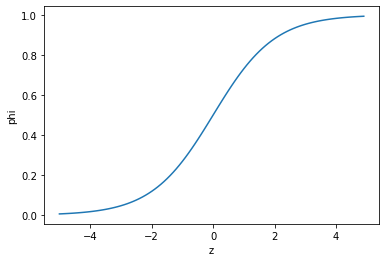

In [9]:
## z값이 -5 ~ 5일때 sigmoid function 값을 계산하여 차트로 표현하라 (z값의 간격은 0.1) 
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

----------------------------------------------------------------
## Binary Classification with Logistic Regression

In [10]:
## target = Bream or Smelt인 경우를 분류하기 
## 먼저 or 연산자 "|"를 사용해 train/target dataset을 생성한다. 
## --> train_target이 "Bream", "Smelt"인 경우 True값을 갖게 된다.  

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
bream_smelt_indexes[:5]

array([[ True],
       [False],
       [ True],
       [False],
       [False]])

In [29]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
#### Error 발생하는데 원인을 모르겠음.... 

IndexError: boolean index did not match indexed array along dimension 1; dimension is 5 but corresponding boolean dimension is 1

In [ ]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(train_bream_smelt, target_bream_smelt)
model_2.score(train_bream_smelt, target_bream_smelt)

In [ ]:
print( model_2.predict(train_bream_smelt[:5]) )
print( model_2.predict_proba(train_bream_smelt[:5]) )

---------------------------------------------------------------------
## Softmax function
- sigmoid function은 하나의 선형방정식의 출력값을 0~1 사이 값(확률)로써 만들어 준다. 
- 반면 softmax function은 다수의 선형방정식의 출력값을 각각 0~1 사이로 만든 후, 이를 다시 전체 합이 1이 되도록 만든다. 
- 전체 합이 1이 되도록 하기 위해 지수함수를 사용하기 때문에, 정규화된 지수함수라고도 한다. 

In [18]:
## Logistic Regression을 사용해 7개의 생선중 어떤 것인지 분류하기 

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(train_scaled, train_target)

print( model_lr.score(train_scaled, train_target) )
print( model_lr.score(test_scaled, test_target) )

0.8067226890756303
0.85


C:\Users\Seoyeon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
## Logistic Regression의 C값은 릿지회귀의 alpha값과 같이 계수값을 제어한다. (over&under fitting을 방지한다.)
## default = 1이며 작을수록 규제가 커진다. 
model_lr = LogisticRegression(C=20, max_iter=1000)
model_lr.fit(train_scaled, train_target)

print( model_lr.score(train_scaled, train_target) )
print( model_lr.score(test_scaled, test_target) )

0.9327731092436975
0.925


C:\Users\Seoyeon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [26]:
print( model_lr.predict(test_scaled[:5]) )
print( np.round(model_lr.predict_proba(test_scaled[:5]), 3) )

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
